In [1]:
''' Environment Requirements'''

# Using Python 3.9.6 64-bit
# Install libraries

# pip3 install os
# pip3 install pandas 
# pip3 install glob

' Environment Requirements'

In [2]:
'''Import libraries'''

import os
import pandas as pd
import glob
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from nltk.corpus import stopwords
import string 
import matplotlib.pyplot as plt
import re
# from bs4 import BeautifulSoup
%matplotlib inline

In order to maintain the ham:spam ratio (which differs in each folder we have been provided), we have collated all the "ham" text files into one large "ham" array, and all the spam text files into one large "spam array". 

To achieve this we used the libraries *os* and *glob*: the former sets/changes the working directory, while the latter searches for a specific file pattern. Since our ham/spam folders were nested, glob was really useful......

In [3]:
'''Set paths to download files'''

# Set working directory: 
path = "C:/Users/64277/OneDrive - AUT University/Data Mining - COMP723/Data Mining Assignment"

# Change the working directory 
os.chdir(path)

ham_spam_files = glob.glob(path + '/enron*/*am/*am.txt')

In [4]:
# '''Debugging'''
# debug - iterating through lists in python *** CAN DELETE LATER ***

# firstTen = ham_spam_files[0:10]

# # print(firstTen)

# n = 0
# for file in ham_spam_files: 

#     if "enron1" in file: 
#         n+=1
#     if "spam" in file: 
#         print("success")

# print("There are", n, "text files within enron1")

In [5]:
'''iterate through all the files Note  this takes 5 to 10 minutes to process'''

# loop through list of files and store the output into a dataframe using DataFrame.loc

column_names = (["category", "message", "enron folder"])
df = pd.DataFrame(columns = column_names)
i = 0

for f in ham_spam_files:
    # see if enron1, 2, 3, 4, 5: 
    if "spam" in f: 
        df.loc[i, ['category']] = "spam"
    if "ham" in f: 
        df.loc[i, ['category']] = "ham"
    # get the folder 
    for x in range(1,6): 

        if ("enron" + str(x)) in f: 
            df.loc[i, ['enron folder']]= "enron" + str(x)
    # open the file path and read in text
    with open(f, 'r', encoding = 'ascii', errors='ignore') as file:
        df.loc[i, ['message']] = file.read()
    i += 1

    
#Print result
print(f'Successfully created  Temp dataframe for Ham:Spam with shape {df.shape}')

Successfully created  Temp dataframe for Ham:Spam with shape (27716, 3)


In [6]:
''' Explore the data'''

# print row one of the data frame to check our data
print(df.iloc[0])

# verify shape one more time
print(f'Shape of our dataframe is {df.shape}')

# how many words are in the data?

print(df['message'].apply(lambda x: len(x.split(' '))).sum())
# there are 7 million words in our dataset


category                                            ham
message         Subject: christmas tree farm pictures\n
enron folder                                     enron1
Name: 0, dtype: object
Shape of our dataframe is (27716, 3)
8109764


In [7]:
'''Clean the data'''

# check for duplicates and remove them 
df.drop_duplicates(inplace = True) 

# show the new shape
df.shape

# drops 661 rows from our dataset!

(27055, 3)

In [8]:
'''Clean the data 2.0 '''

# show the number of missing data (e.g., "Nan","NAN" or "na") for each column
df.isnull().sum()

# no missing data!

category        0
message         0
enron folder    0
dtype: int64

In [9]:
'''Convert the Category field from text to an int'''

df['label'] = df['category'].apply(lambda x:1 if x=='spam' else 0)

# check sample of the data
df.sample(5)

,category,message,enron folder,label
14503,ham,Subject: re :\nbased on my discussions with je...,enron3,0
20303,spam,Subject: economize 55 % and more with your rec...,enron4,1
26405,spam,Subject: cia - llis softabs is the best !\nhel...,enron5,1
26851,spam,Subject: fpa notice : ebay misrepresentation o...,enron5,1
8153,ham,"Subject: re :\ndenise ,\nno problem .\nwe shal...",enron2,0


In [10]:
'''Split the data into training and testing using train_test_split'''
# This is the **baseline** model that we will be using to compare it to the 
# more advanced models, such as neural networks, naive bayes and random forest. 

from sklearn.model_selection import train_test_split

emails = df['message'].values
y = df['label'].values


email_train, email_test, y_train, y_test = train_test_split(
  emails, y, test_size=0.3, random_state=1000, stratify = y)

# Part I - Vectorising using Bag of Words

In [11]:
''' Bag of words Vectoriser'''

# Vectorise the emails with a Bag of Words (BoW) approach using the CountVectorizer from SkLearn
from sklearn.feature_extraction.text import CountVectorizer

#initialise the vectoriser
BoWvectorizer = CountVectorizer()

# # center the training set - standard score
BoW_result= BoWvectorizer.fit(email_train)
print(BoW_result)

# transform the rest of the data
X_train = BoW_result.transform(email_train)
X_test = BoW_result.transform(email_test)

# print(BoW_result['label'== 0].vocabulary_) - we can see the results of the tokenisation!
# type(BoW_result)
X_train

CountVectorizer()


<18938x114646 sparse matrix of type '<class 'numpy.int64'>'
	with 2214517 stored elements in Compressed Sparse Row format>

## Comments on the Bag of Words tokenising model: 

The resulting feature vectors have 18,938 samples which is also the number of training samples after the train_test split.  
Each sample has 114,646 dimensions which is the size of the words in our sample's largest email (i.e., this is the size of our vocabulary)

The count vectoriser also gives us a sparse matrix. This is a type of matrices that is less intensive on the processing memory as it only counts non-zero elements in matrices where there are few non-zero elements. 

Python's CountVectoriser() function tokenises each word in the email message, and it removes special punctuation and other special characters. 
#TODO: it is possible to use a custom tokeniser with CountVectoriser using the nltk library

# I. Logistic Regression 
* uses bag of words vectoriser with all default settins used (no max features, no language specification, no stop words used)
* special characters have been removed with the default settings in CountVetoriser
* duplicate emails have been removed 
* no special feature extraction performed: very simple baseline model
For more information on the function visit: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [12]:
'''Logistic Regression'''

## Apply Classification Algorithms on the Conflated data  ###
## Apply Logistic Regression Algorithm on the data ##
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(class_weight ="balanced", max_iter = 1000000)
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)

# Calculate accuracy score using Logistic Regression
score = classifier_lr.score(X_test, y_test)
print(f"Accuracy with Logistic Regression: {score * 100}% ")
print("*************************************************************")

# The target columns we want to classify
target_names = ['Ham', 'Spam']

# Get performance of algorithm with F score
f1score = f1_score(y_test, y_pred_lr)
print(f"F1 score with Logistic Regression: {f1score * 100}% ")
print("*************************************************************")

# Get classification stats
print('Classification report:')
report = classification_report(y_test, y_pred_lr,target_names=target_names)
print(report)
print("*************************************************************")

# Get confusion matrix
print('Logistic Regression Confusion Matrix: \n', confusion_matrix(y_test, y_pred_lr))

Accuracy with Logistic Regression: 98.87889614389552% 
*************************************************************
F1 score with Logistic Regression: 98.79230258792302% 
*************************************************************
Classification report:
              precision    recall  f1-score   support

         Ham       0.99      0.98      0.99      4371
        Spam       0.98      0.99      0.99      3746

    accuracy                           0.99      8117
   macro avg       0.99      0.99      0.99      8117
weighted avg       0.99      0.99      0.99      8117

*************************************************************
Logistic Regression Confusion Matrix: 
 [[4304   67]
 [  24 3722]]


In [13]:
'''Debugging'''
# x = 0
# for i in y_test:
#     if 1 in y_test:
#         x += 1

# print(x)

'Debugging'

Text(0.5, 257.44, 'Predicted label')

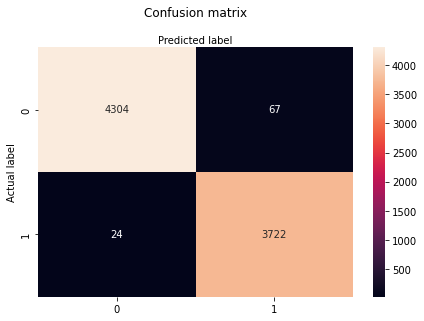

In [14]:
'''Visualisation of confusion matrix for baseline logistic regression classifier'''

# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# save confusion matrix as object: 
cnf_matrix = confusion_matrix(y_test, y_pred_lr)

class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="rocket" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# I. Deep Neural Networks learning model
* uses the logistic activation function
* hidden layer sizes: *insert notes here*
* max_iterations, random state notes....



In [15]:
''' Neural Networks model using the bag of words pre-processing and 70:30 data split'''

# Applying Neural Network model logistic on the data #
from sklearn.neural_network import MLPClassifier

classifer_nn = MLPClassifier(activation='logistic', solver='lbfgs', learning_rate_init=0.1, alpha=1e-5,
                        hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000)
#clf.fit(predicted_train, np.ravel(target_train, order='C'))
classifer_nn = classifer_nn.fit(X_train, y_train)
y_pred_nn = classifer_nn.predict(X_test)

# Calculate accuracy score using MLP Neural Network
score_nn = classifer_nn.score(X_test, y_test)
print(f"Accuracy with MLP Classifier: {score_nn * 100}% ")
print("*************************************************************")

# Get performance of algorithm with F score
f1score_nn = f1_score(y_test, y_pred_nn)
print(f"F1 score with MLP Classifier: {f1score_nn * 100}% ")
print("*************************************************************")

# Get classification stats
print("Classification Report: ")
print(classification_report(y_test,y_pred_nn, target_names = target_names))
print("*************************************************************")

# Get confusion matrix
print("MLP Confusion Matrix: \n",confusion_matrix(y_test,y_pred_nn))
print("\nEnds")

Accuracy with MLP Classifier: 98.9404952568683% 
*************************************************************
F1 score with MLP Classifier: 98.85516506922258% 
*************************************************************
Classification Report: 
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      4371
        Spam       0.99      0.99      0.99      3746

    accuracy                           0.99      8117
   macro avg       0.99      0.99      0.99      8117
weighted avg       0.99      0.99      0.99      8117

*************************************************************
MLP Confusion Matrix: 
 [[4318   53]
 [  33 3713]]

Ends


# I. Naive Bayes 

- multinomial naive bayes

In [16]:
''' Naive Bayes model using the bag of words pre-processing and 70:30 data split'''

# Model Generation Using Multinomial Naive Bayes #
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)

# Calculate accuracy score using Multinomial Naive Bayes
score_nb = classifier_nb.score(X_test, y_test)
print(f"Accuracy with MultinomialNB: {score_nb * 100}% ")
print("*************************************************************")

# Get performance of algorithm with F score
f1score_nb = f1_score(y_test, y_pred_nb)
print(f"F1 score with MultinomialNB: {f1score_nb * 100}% ")
print("*************************************************************")

# Get classification stats
print("Classification Report: ") 
print(classification_report(y_test,y_pred_nb, target_names = target_names))
print("*************************************************************")

# Get confusion matrix
print("MultinomialNB Confusion Matrix: \n",confusion_matrix(y_test,y_pred_nb))
print("\nEnds")

Accuracy with MultinomialNB: 98.98977454724653% 
*************************************************************
F1 score with MultinomialNB: 98.9081225033289% 
*************************************************************
Classification Report: 
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      4371
        Spam       0.99      0.99      0.99      3746

    accuracy                           0.99      8117
   macro avg       0.99      0.99      0.99      8117
weighted avg       0.99      0.99      0.99      8117

*************************************************************
MultinomialNB Confusion Matrix: 
 [[4321   50]
 [  32 3714]]

Ends


Text(0.5, 257.44, 'Predicted label')

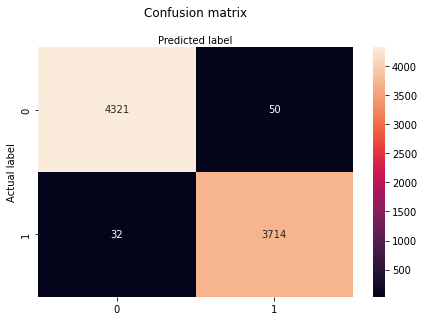

In [17]:
''' Visualisation of confusion Matrix for Naive Bayes'''

# save confusion matrix as object: 
cnf_matrix = confusion_matrix(y_test, y_pred_nb)

# initialise plot
class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="rocket" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# I. Random Forest



In [18]:
''' Random Forest model using the bag of words pre-processing and 70:30 data split'''

# Apply Random Forest algorithm on the data - by far the slowest algorithm! #
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)

# Calculate accuracy score using Random Forest
score_rf = classifier_rf.score(X_test, y_test)
print(f"Accuracy with Random Forest: {score_rf * 100}% ")
print("*************************************************************")

# Get performance of algorithm with F score
f1score_rf = f1_score(y_test, y_pred_rf)
print(f"F1 score with Random Forest: {f1score_rf * 100}% ")
print("*************************************************************")

# Get classification stats
print('Classification report: ')
print(classification_report(y_test,y_pred_rf, target_names = target_names))
print("*************************************************************")

# Get confusion matrix
print("Random Forest Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))

# Part II. Using a second base line model - lets test the classifiers using this data!

In [19]:
''' Second baseline model using enron 1, 3, 5  as training data and enron 2, 4 as test data'''

# split the data using dataframe extraction techniques
x_train_df = df.loc[(df['enron folder'] == "enron1") |(df['enron folder'] == "enron3" ) | (df['enron folder'] == "enron5")]
x_train2 = x_train_df['message'].values # training email messages
x_test_df = df[(df['enron folder'] == "enron2") |(df['enron folder'] == "enron4" )] 
x_test2 = x_test_df['message'] # testing email messages
y_train_df = df[(df['enron folder'] == "enron1") |(df['enron folder'] == "enron3" ) | (df['enron folder'] == "enron5")] 
y_train2 = y_train_df['label']# training labels
y_test_df = df[(df['enron folder'] == "enron2") |(df['enron folder'] == "enron4" )] 
y_test2 = y_test_df['label']# testing labels

# debug to make sure this has worked
# print(y_test[:10])
# print(y_test[-10:])
# print(x_train[:10])
# print(x_train[-10:])
#  # etc

In [20]:
'''Vectorise the emails with a Bag of Words (BoW) approach using the CountVectorizer from SkLearn'''
# from sklearn.feature_extraction.text import CountVectorizer

# initialise the vectoriser and fit the data
vectorizer = CountVectorizer()
vec_fit =vectorizer.fit(x_train2)

# transform the data
x_train2 = vec_fit.transform(x_train2)
x_test2  = vec_fit.transform(x_test2)

# view shape of the sparse matrix
x_train2

<15380x98678 sparse matrix of type '<class 'numpy.int64'>'
	with 1819251 stored elements in Compressed Sparse Row format>

# II. Logistic Regression 

In [21]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score

classifier_lr2 = LogisticRegression(class_weight ="balanced", max_iter = 1000000)
classifier_lr2.fit(x_train2, y_train2)
y_pred_lr2 = classifier_lr2.predict(x_test2)

# Calculate accuracy score using Logistic Regression
score_lr2 = classifier_lr2.score(x_test2, y_test2)
print(f"Accuracy with Logistic Regression - Enron Folder Split: {score_lr2 * 100}% ")
print("*************************************************************")

# The target columns we want to classify
target_names = ['Ham', 'Spam']

# Get performance of algorithm with F score
f1score_lr2 = f1_score(y_test2, y_pred_lr2)
print(f"F1 score with Logistic Regression - Enron Folder Split: {f1score_lr2 * 100}% ")
print("*************************************************************")

# Get classification stats
print('Classification report - Enron Folder Split:')
report = classification_report(y_test2, y_pred_lr2,target_names=target_names)
print(report)
print("*************************************************************")

# Get confusion matrix
print('Logistic Regression Confusion Matrix - Enron Folder Split: \n', confusion_matrix(y_test2, y_pred_lr2))

Accuracy with Logistic Regression - Enron Folder Split: 95.88008565310493% 
*************************************************************
F1 score with Logistic Regression - Enron Folder Split: 96.0172228202368% 
*************************************************************
Classification report - Enron Folder Split:
              precision    recall  f1-score   support

         Ham       0.99      0.93      0.96      5827
        Spam       0.93      0.99      0.96      5848

    accuracy                           0.96     11675
   macro avg       0.96      0.96      0.96     11675
weighted avg       0.96      0.96      0.96     11675

*************************************************************
Logistic Regression Confusion Matrix - Enron Folder Split: 
 [[5396  431]
 [  50 5798]]


Text(0.5, 257.44, 'Predicted label')

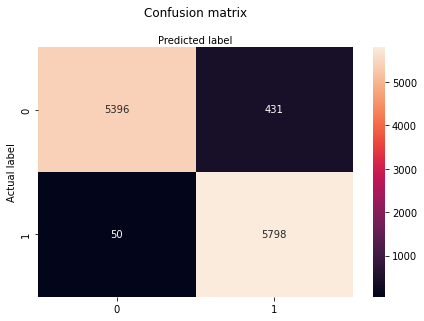

In [22]:
''' Visualisation of confusion Matrix for Logistic Regression Part II'''

# save confusion matrix as object: 
cnf_matrix = confusion_matrix(y_test2, y_pred_lr2)

class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="rocket" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# II. Multinomial Naive Bayes

In [23]:
'''Multinomial Naive Bayes model using the BoW pre-processing and manual split by enron folder'''

# Model Generation Using Multinomial Naive Bayes #
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
classifier_nb2 = MultinomialNB()
classifier_nb2.fit(x_train2, y_train2)
y_pred_nb2 = classifier_nb2.predict(x_test2)

# Calculate accuracy score using Multinomial Naive Bayes
score_nb2 = classifier_nb2.score(x_test2, y_test2)
print(f"Accuracy with MultinomialNB - Enron Folder Split: {score_nb2 * 100}% ")
print("*************************************************************")

# Get performance of algorithm with F score
f1score_nb2 = f1_score(y_test2, y_pred_nb2)
print(f"F1 score with MultinomialNB - Enron Folder Split: {f1score_nb2 * 100}% ")
print("*************************************************************")

# Get classification stats
print("Classification Report - Enron Folder Split: ") 
print(classification_report(y_test2,y_pred_nb2, target_names = target_names))
print("*************************************************************")

# Get confusion matrix
print("MultinomialNB Confusion Matrix - Enron Folder Split: \n",confusion_matrix(y_test2,y_pred_nb2))
print("\nEnds")

Accuracy with MultinomialNB - Enron Folder Split: 96.84796573875803% 
*************************************************************
F1 score with MultinomialNB - Enron Folder Split: 96.9220475075276% 
*************************************************************
Classification Report - Enron Folder Split: 
              precision    recall  f1-score   support

         Ham       0.99      0.95      0.97      5827
        Spam       0.95      0.99      0.97      5848

    accuracy                           0.97     11675
   macro avg       0.97      0.97      0.97     11675
weighted avg       0.97      0.97      0.97     11675

*************************************************************
MultinomialNB Confusion Matrix - Enron Folder Split: 
 [[5513  314]
 [  54 5794]]

Ends


Text(0.5, 257.44, 'Predicted label')

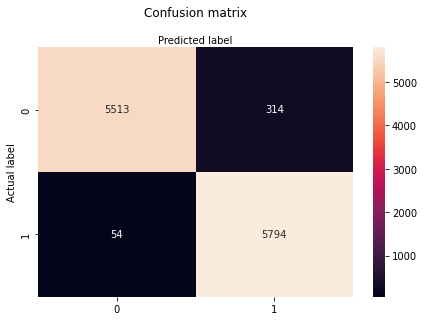

In [24]:
''' Visualisation of confusion Matrix for Naive Bayes Part II'''

# save confusion matrix as object: 
cnf_matrix = confusion_matrix(y_test2, y_pred_nb2)

class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="rocket" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# II. Neural Networks - Multi Layer Pereceptron (MLP) Layer

In [25]:
''' Neural Networks model using the bag of words pre-processing and manual split by enron folder'''

# Applying Neural Network model logistic on the data #
from sklearn.neural_network import MLPClassifier

classifer_nn2 = MLPClassifier(activation='logistic', solver='lbfgs', learning_rate_init=0.1, alpha=1e-5,
                        hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000)
# clf.fit(predicted_train, np.ravel(target_train, order='C'))
classifer_nn2 = classifer_nn2.fit(x_train2, y_train2)
y_pred_nn2 = classifer_nn2.predict(x_test2)

# Calculate accuracy score using MLP Neural Network
score_nn2 = classifer_nn2.score(x_test2, y_test2)
print(f"Accuracy with MLP Classifier - Enron Folder Split: {score_nn2 * 100}% ")
print("*************************************************************")

# Get performance of algorithm with F score
f1score_nn2 = f1_score(y_test2, y_pred_nn2)
print(f"F1 score with MLP Classifier - Enron Folder Split: {f1score_nn2 * 100}% ")
print("*************************************************************")

# Get classification stats
print("Classification Report - Enron Folder Split: ")
print(classification_report(y_test2,y_pred_nn2, target_names = target_names))
print("*************************************************************")

# Get confusion matrix
print("MLP Confusion Matrix - Enron Folder Split: \n",confusion_matrix(y_test2,y_pred_nn2))
print("\nEnds")

Accuracy with MLP Classifier - Enron Folder Split: 97.593147751606% 
*************************************************************
F1 score with MLP Classifier - Enron Folder Split: 97.61763459092836% 
*************************************************************
Classification Report - Enron Folder Split: 
              precision    recall  f1-score   support

         Ham       0.98      0.97      0.98      5827
        Spam       0.97      0.98      0.98      5848

    accuracy                           0.98     11675
   macro avg       0.98      0.98      0.98     11675
weighted avg       0.98      0.98      0.98     11675

*************************************************************
MLP Confusion Matrix - Enron Folder Split: 
 [[5637  190]
 [  91 5757]]

Ends


# II. Random Forest



In [26]:
''' Random Forest model using the bag of words pre-processing and 70:30 data split'''

# Apply Random Forest algorithm on the data - by far the slowest algorithm! #
from sklearn.ensemble import RandomForestClassifier
classifier_rf2 = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier_rf2.fit(x_train2, y_train2)
y_pred_rf2 = classifier_rf2.predict(x_test2)

# Calculate accuracy score using Random Forest
score_rf2 = classifier_rf2.score(x_test2, y_test2)
print(f"Accuracy with Random Forest - Enron Folder Split: {score_rf2 * 100}% ")
print("*************************************************************")

# Get performance of algorithm with F score
f1score_rf2 = f1_score(y_test2, y_pred_rf2)
print(f"F1 score with Random Forest - Enron Folder Split: {f1score_rf2 * 100}% ")
print("*************************************************************")

# Get classification stats
print('Classification report - Enron Folder Split: ')
print(classification_report(y_test2,y_pred_rf2, target_names = target_names))
print("*************************************************************")

# Get confusion matrix
print("Random Forest Confusion Matrix - Enron Folder Split: \n", confusion_matrix(y_test2, y_pred_rf2))

# Part III: Using a TF-IFD vectoriser on the top performing classifiers. Does the vectoriser make a difference to our results?

In the previous chunks we have been using the CountVectorizer() function (Bag of Words), but since our accuracy and recall has dropped in the [enron1, enron5, enron3]:[enron2, enron4] data - compared to the 70:30 split data, it might be worthwhile to try another type of vectoriser to see if it improves. 

## Explanation of TF-IDF

Using TF-IDF instead of BOW, TF-IDF also takes into account the frequency instead of just the occurrence.
This is calculated as:

* Term frequency = (Number of Occurrences of a word)/(Total words in the document)**

* IDF(word) = Log((Total number of documents)/(Number of documents containing the word))** 

* TF-IDF is the product of the two.**

In [27]:
'''Vectorise the data using the TfidfTransformer''' 

from sklearn.feature_extraction.text import TfidfTransformer

tvvectoriser=TfidfVectorizer(max_df=0.10,min_df=2,stop_words='english')

message_values = df['message'].values
vectors = tvvectoriser.fit_transform(message_values)

'''Split the data using 70:30 split''' 
x_train3, x_test3, y_train3, y_test3 = train_test_split(
  vectors, y, test_size=0.3, random_state=1000, stratify = y) 

In [28]:
'''Multinomial Naive Bayes model using the tfidf vectorisation and 70:30 split'''

# Model Generation Using Multinomial Naive Bayes #
# from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
classifier_nb3 = MultinomialNB()
classifier_nb3.fit(x_train3, y_train3)
y_pred_nb3 = classifier_nb3.predict(x_test3)

# Calculate accuracy score using Multinomial Naive Bayes
score_nb3 = classifier_nb3.score(x_test3, y_test3)
print(f"Accuracy with MultinomialNB - 70:30 split with TFIDF: {score_nb3 * 100}% ")
print("*************************************************************")

# Get performance of algorithm with F score
f1score_nb3 = f1_score(y_test3, y_pred_nb3)
print(f"F1 score with MultinomialNB - 70:30 split with TFIDF: {f1score_nb3 * 100}% ")
print("*************************************************************")

# Get classification stats
print("Classification Report - 70:30 split with TFIDF: ") 
print(classification_report(y_test3,y_pred_nb3, target_names = target_names))
print("*************************************************************")

# Get confusion matrix
print("MultinomialNB Confusion Matrix - 70:30 split with TFIDF: \n",confusion_matrix(y_test3, y_pred_nb3))
print("\nEnds")

Accuracy with MultinomialNB - 70:30 split with TFIDF: 98.70641862757176% 
*************************************************************
F1 score with MultinomialNB - 70:30 split with TFIDF: 98.59079318212322% 
*************************************************************
Classification Report - 70:30 split with TFIDF: 
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99      4371
        Spam       0.99      0.98      0.99      3746

    accuracy                           0.99      8117
   macro avg       0.99      0.99      0.99      8117
weighted avg       0.99      0.99      0.99      8117

*************************************************************
MultinomialNB Confusion Matrix - 70:30 split with TFIDF: 
 [[4339   32]
 [  73 3673]]

Ends


In [29]:
'''MLP Classifier with TF_IDF and 70:30 split'''

# Applying Neural Network model logistic on the data #
# from sklearn.neural_network import MLPClassifier

classifer_nn3 = MLPClassifier(activation='logistic', solver='lbfgs', learning_rate_init=0.1, alpha=1e-5,
                        hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000)
# clf.fit(predicted_train, np.ravel(target_train, order='C'))
classifer_nn3 = classifer_nn3.fit(x_train3, y_train3)
y_pred_nn3 = classifer_nn3.predict(x_test3)

# Calculate accuracy score using MLP Neural Network
score_nn3_b = classifer_nn3.score(x_test3, y_test3)
print(f"Accuracy with MLP Classifier - Enron Folder Split with TFIDF: {score_nn3_b * 100}% ")
print("*************************************************************")

# Get performance of algorithm with F score
f1score_nn3_b = f1_score(y_test3, y_pred_nn3)
print(f"F1 score with MLP Classifier - Enron Folder Split with TFIDF: {f1score_nn3_b * 100}% ")
print("*************************************************************")

# Get classification stats
print("Classification Report - Enron Folder Split with TFIDF: ")
print(classification_report(y_test3, y_pred_nn3, target_names = target_names))
print("*************************************************************")

# Get confusion matrix
print("MLP Confusion Matrix - Enron Folder Split with TFIDF: \n",confusion_matrix(y_test3, y_pred_nn3))
print("\nEnds")

Accuracy with MLP Classifier - Enron Folder Split with TFIDF: 53.84994456079832% 
*************************************************************
F1 score with MLP Classifier - Enron Folder Split with TFIDF: 0.0% 
*************************************************************
Classification Report - Enron Folder Split with TFIDF: 
              precision    recall  f1-score   support

         Ham       0.54      1.00      0.70      4371
        Spam       0.00      0.00      0.00      3746

    accuracy                           0.54      8117
   macro avg       0.27      0.50      0.35      8117
weighted avg       0.29      0.54      0.38      8117

*************************************************************
MLP Confusion Matrix - Enron Folder Split with TFIDF: 
 [[4371    0]
 [3746    0]]

Ends


C:\Users\64277\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\64277\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\64277\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [57]:
''' Second baseline model using enron 1, 3, 5  as training data and enron 2, 4 as test data'''

# import library (if haven't already)
from sklearn.feature_extraction.text import TfidfTransformer

# need to use max features otherwise the sparse matrices have different lengths and this is not suitable for our classifying model
tvvectoriser=TfidfVectorizer(max_df=0.95,min_df=2, max_features = 50, stop_words = 'english')

# split the data using dataframe extraction techniques
x_train_df = df.loc[(df['enron folder'] == "enron1") |(df['enron folder'] == "enron3" ) | (df['enron folder'] == "enron5")]
x_train3_b = x_train_df['message'].values # training email messages
x_test_df = df[(df['enron folder'] == "enron2") |(df['enron folder'] == "enron4" )] 
x_test3_b = x_test_df['message'].values # testing email messages
y_train_df = df[(df['enron folder'] == "enron1") |(df['enron folder'] == "enron3" ) | (df['enron folder'] == "enron5")] 
y_train3_b = y_train_df['label'].values # training labels
y_test_df = df[(df['enron folder'] == "enron2") |(df['enron folder'] == "enron4" )] 
y_test3_b = y_test_df['label'].values # testing labels

# # debug
# print(len(x_train3_b))
# print(len(y_train3_b))
# print(len(x_test3_b))
# print(len(y_test3_b))

# all the same lengths?

'''Vectorise using Tfidf method'''

# messages = df['message'].values
x_train3_b = tvvectoriser.fit_transform(x_train3_b)
x_test3_b = tvvectoriser.fit_transform(x_test3_b)


In [58]:
'''Multinomial Naive Bayes model using the tfidf vectorisation and manual enron folder split'''

from sklearn.naive_bayes import MultinomialNB
# Model Generation Using Multinomial Naive Bayes #
# from sklearn.naive_bayes import MultinomialNB
# Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
classifier_nb3_b = MultinomialNB()
classifier_nb3_b.fit(x_train3_b, y_train3_b)
y_pred_nb3_b = classifier_nb3_b.predict(x_test3_b)

# Calculate accuracy score using Multinomial Naive Bayes
score_nb3_b = classifier_nb3_b.score(x_test3_b, y_test3_b)
print(f"Accuracy with MultinomialNB - Enron Folder split with TFIDF: {score_nb3_b * 100}% ")
print("*************************************************************")

# Get performance of algorithm with F score
f1score_nb3_b = f1_score(y_test3_b, y_pred_nb3_b)
print(f"F1 score with MultinomialNB - Enron Folder split with TFIDF: {f1score_nb3_b * 100}% ")
print("*************************************************************")

# Get classification stats
print("Classification Report - Enron Folder split with TFIDF: ") 
print(classification_report(y_test3_b, y_pred_nb3_b, target_names = target_names))
print("*************************************************************")

# Get confusion matrix
print("MultinomialNB Confusion Matrix - Enron Folder split with TFIDF: \n",confusion_matrix(y_test3_b, y_pred_nb3_b))
print("\nEnds")

Accuracy with MultinomialNB - Enron Folder split with TFIDF: 67.22912205567452% 
*************************************************************
F1 score with MultinomialNB - Enron Folder split with TFIDF: 55.20955279793959% 
*************************************************************
Classification Report - Enron Folder split with TFIDF: 
              precision    recall  f1-score   support

         Ham       0.61      0.94      0.74      5827
        Spam       0.88      0.40      0.55      5848

    accuracy                           0.67     11675
   macro avg       0.74      0.67      0.65     11675
weighted avg       0.74      0.67      0.65     11675

*************************************************************
MultinomialNB Confusion Matrix - Enron Folder split with TFIDF: 
 [[5491  336]
 [3490 2358]]

Ends


In [59]:
'''MLP Neural Network classifier model using the tfidf vectorisation and manual enron folder split'''

# Applying Neural Network model logistic on the data #
# from sklearn.neural_network import MLPClassifier

classifer_nn3_b = MLPClassifier(activation='logistic', solver='lbfgs', learning_rate_init=0.1, alpha=1e-5,
                        hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000)
# clf.fit(predicted_train, np.ravel(target_train, order='C'))
classifer_nn3_b = classifer_nn3_b.fit(x_train3_b, y_train2)
y_pred_nn3_b = classifer_nn3_b.predict(x_test3_b)

# Calculate accuracy score using MLP Neural Network
score_nn3_b = classifer_nn3_b.score(x_test3_b, y_test3_b)
print(f"Accuracy with MLP Classifier - Enron Folder Split with TFIDF: {score_nn3_b * 100}% ")
print("*************************************************************")

# Get performance of algorithm with F score
f1score_nn3_b = f1_score(y_test3_b, y_pred_nn3_b)
print(f"F1 score with MLP Classifier - Enron Folder Split with TFIDF: {f1score_nn3_b * 100}% ")
print("*************************************************************")

# Get classification stats
print("Classification Report - Enron Folder Split with TFIDF: ")
print(classification_report(y_test3_b, y_pred_nn3_b, target_names = target_names))
print("*************************************************************")

# Get confusion matrix
print("MLP Confusion Matrix - Enron Folder Split with TFIDF: \n",confusion_matrix(y_test3_b, y_pred_nn3_b))
print("\nEnds")

Accuracy with MLP Classifier - Enron Folder Split with TFIDF: 72.43683083511777% 
*************************************************************
F1 score with MLP Classifier - Enron Folder Split with TFIDF: 65.64168268204142% 
*************************************************************
Classification Report - Enron Folder Split with TFIDF: 
              precision    recall  f1-score   support

         Ham       0.66      0.92      0.77      5827
        Spam       0.87      0.53      0.66      5848

    accuracy                           0.72     11675
   macro avg       0.77      0.72      0.71     11675
weighted avg       0.77      0.72      0.71     11675

*************************************************************
MLP Confusion Matrix - Enron Folder Split with TFIDF: 
 [[5383  444]
 [2774 3074]]

Ends


C:\Users\64277\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Appendix (Code not utilised in assessment)

## Neural Networks using Tensorflow & Keras
We want to use the sigmoid function for the output layer since we are dealing with a binary classification problem
if it were a multi-label classification problem then we would want to use the softmax function for the output layer

weights most important part of a neural network - start with random values and then uses the backpropogation method. 

Dependencies: 
- **pip install keras**
- **pip install tensorflow**

Note: **pip install tensorflow** might not work so try **pip install tensorflow --user** in Windows 


The default settings include: 

    - "image_data_format": "channels_last",
    - "epsilon": 1e-07,
    - "floatx": "float32",
    - "backend": "tensorflow

(These can be found in the json file, enter: "%USERPROFILE%/.keras/keras.json" into command prompt on windows, 
or $HOME/.keras/keras.json on mac. 


In [60]:
# # check tensorflow version: 
# import tensorflow as tf
# tf.__version__

# # using version 2.6.1
# from keras.models import Sequential
# from keras import layers

# input_dim = X_train.shape[1]  # Number of features
# model = Sequential()
# model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# ***************************************************************

# # Summary of Keras NN model
# model.compile(loss='binary_crossentropy', 
#              optimizer='adam', 
#             metrics=['accuracy'])
# model.summary()

# ***************************************************************


# Fit the NN Model to the data: 
# X_train[:15380]
# print(X_train) #  (18937, 113176)
# # print(y_train) # length 15380, 27,715)
# history = model.fit(X_train[:15380], y_train,
#                     epochs=100,
#                     verbose=False,
#                     validation_data=(X_test[:15380], y_test),
#                     batch_size=10)

# X_train.getnnz()

## SpaCy library for lemmatisation etc. 

In [61]:
# # Import spaCy and load the language library
# import spacy
# #you will need this line below to download the package
# #!python -m spacy download en_core_web_sm
# nlp = spacy.load('en_core_web_sm')

# # Convert dataframe to string
# #df['message']= df['message'].apply(str)

# # Create a Doc object of df
# doc = nlp(df[0, 'message'].values)
# token_list = []
# # collect each token separately with their POS Tag, dependencies and lemma
# for token in doc:
#     output = [token.text, token.pos_, token.dep_,token.lemma_]
#     token_list.append(output)
# # create DataFrame using data 
# df_tokenised = pd.DataFrame(token_list, columns =['Word', 'POS Tag', 'Dependencies', 'Lemmatized Word']) 